## Gaussian Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import rbf_kernel

In [2]:
# Config parameters

N = 10                     # number of training points
n = 50                     # number of test points
sn = 0.00005               # noise variance
kernel_param = 0.1         # rbf kernel parameter
gamma= 0.5/kernel_param    # Overall rbf_kernel() gamma

In [3]:
# Definition of the unknown function (sine) we are trying to approximate

f = lambda x: np.sin(0.9*x).flatten()

In [4]:
# Images centering
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [5]:

def plot_f(x,y, title, symbol, color, size):
    plt.figure(1, figsize=size)
    plt.clf()
    plt.plot(x, y, symbol, color = color)
    plt.title(title)
    plt.axis([-5, 5, -4, 4])

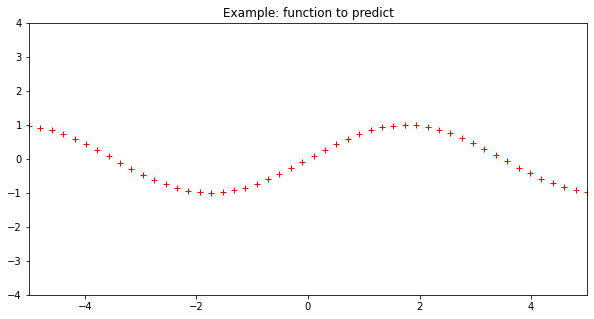

In [6]:
# Example 
Xe = np.linspace(-5,5, n)
Ye = f(Xe)

plot_f(Xe, Ye, 'Example: function to predict', symbol='+', color='r', size=(10, 5))

#### Test points

(-5.0, 5.0, -4.0, 4.0)

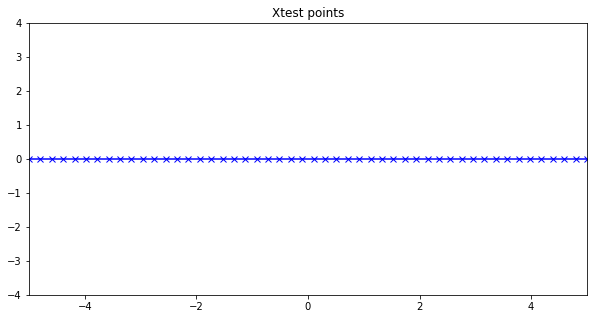

In [7]:
# We pick up n points equally spaced on x-axis in the range (-5, 5)
Xtest = np.linspace(-5,5, n).reshape(-1,1)

y = np.zeros(n)

plt.figure(1, figsize=(10, 5))
plt.clf()
plt.plot(Xtest, y, marker='x', color = 'b')
plt.title('Xtest points')
plt.axis([-5, 5, -4, 4])

(-5.0, 5.0, -4.0, 4.0)

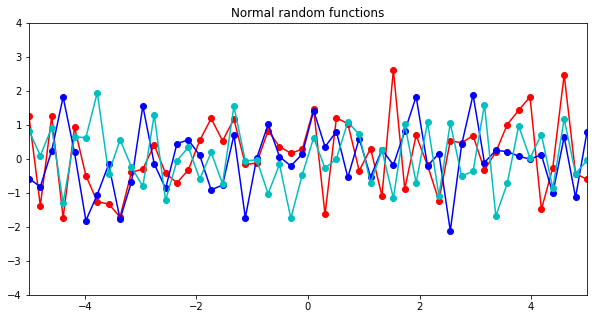

In [8]:
# We sample 3 times n random points from a standard normal 
sample_f = np.random.normal(size=(n,3))

plt.figure(1, figsize=(10, 5))

plt.clf()
plt.plot(Xtest, sample_f[:,0], marker='o', color = 'r')
plt.plot(Xtest, sample_f[:,1], marker='o', color = 'b')
plt.plot(Xtest, sample_f[:,2], marker='o', color = 'c')
plt.title('Normal random functions')

plt.axis([-5, 5, -4, 4])

In [9]:
# We calculate the covariance matrix (kernel) on the 50 equally spaced Xtest points 
Kss = rbf_kernel(Xtest, Xtest, gamma)

# Cholesky matrix calculation
Lss = np.linalg.cholesky(Kss + sn*np.eye(n))

# Note that Cholesky matrix is used to create correlations among random variables. 
# Suppose that x1 and x2 are independent standard normal variables. 
# The matrix Ls can be used to create new variables z1 and z2 such that the covariance of z1 and z2 equals Σ
# In particular, if you generate p standard normal variates, the Cholesky transformation maps the variables into variables
# for the multivariate normal distribution with covariance matrix Σ and centered at the origin (denoted MVN(0, Σ)).

# See proof below

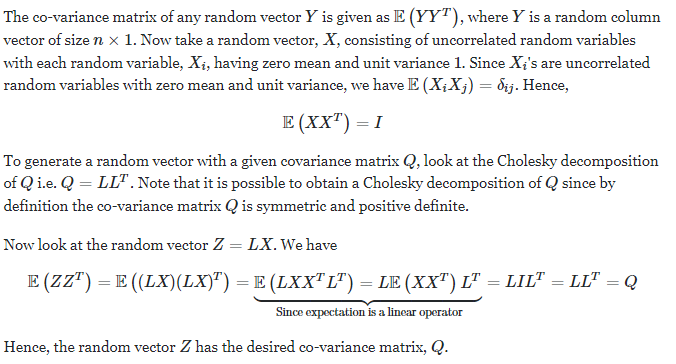

(-5.0, 5.0, -4.0, 4.0)

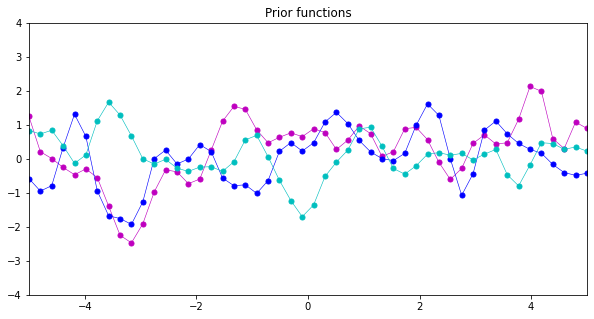

In [10]:
# By Cholesky trasformation we force the priors to have the same covariance matrix of the equally spaced Xtest points 

f_prior = np.dot(Lss, sample_f)

plt.figure(1, figsize=(10, 5))
plt.clf()
plt.plot(Xtest, f_prior[:,0], marker='o', color = 'm', linewidth=0.6, markersize=5)
plt.plot(Xtest, f_prior[:,1], marker='o', color = 'b', linewidth=0.6, markersize=5)
plt.plot(Xtest, f_prior[:,2], marker='o', color = 'c', linewidth=0.6, markersize=5)
plt.title('Prior functions')
plt.axis([-5, 5, -4, 4])

In [11]:
# The resulting priors have mean that tend to zero wwith increasing nand they are far from having a sinewave shape

print(f_prior[:,0].mean())
print(f_prior[:,1].mean())
print(f_prior[:,2].mean())

0.2558078741580652
-0.005559273132245723
0.08919947263432051


#### Train points

Xtrain:
[[ 2.55102041]
 [ 1.53061224]
 [ 0.91836735]
 [-0.71428571]
 [ 0.51020408]
 [-2.14285714]
 [ 0.30612245]
 [-2.55102041]
 [ 3.57142857]
 [ 0.30612245]]
f(Xtrain):
[ 0.74841849  0.98138616  0.73558553 -0.5994847   0.44321649 -0.93667828
  0.27203793 -0.74841849 -0.07262906  0.27203793]
y = f(X) + noise: 
[ 0.74835715  0.98138235  0.73566187 -0.59944457  0.44322353 -0.93664861
  0.27215659 -0.74836805 -0.07254811  0.27211086]


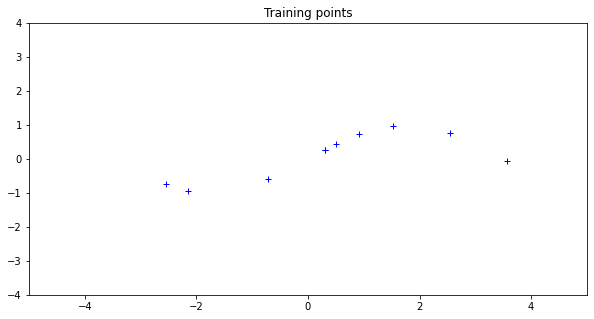

In [12]:
# We sample now some input points without noise from the initial unknown sine function and we use them as training points 
# to adjust our prior functions

# Sample x points
Xdomain = np.reshape(Xtest, np.product(Xtest.shape))
Xtrain = np.random.choice(Xdomain, size=(N, 1))
print('Xtrain:')
print(Xtrain)

print('f(Xtrain):')
print(f(Xtrain))

# Coresponding y=f(x) with noise
Ytrain = f(Xtrain) + sn*np.random.randn(N)

print('y = f(X) + noise: ')
print(Ytrain)

'''
plt.figure(1, figsize=(10, 5))
plt.clf()
plt.plot(Xtest, f(Xtest), marker='o', color = 'g', linewidth=0.6, markersize=3)
plt.plot(Xtrain, Ytrain, symbol='+', color='r', markersize=10)

plt.title('Training points (+)')
plt.axis([-5, 5, -3, 3])
'''

plot_f(Xtrain, Ytrain, 'Training points', symbol='+', color='b', size=(10,5))

### Theory overview

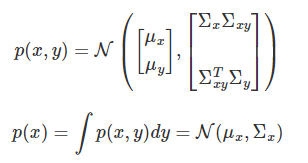

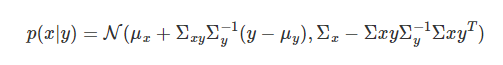

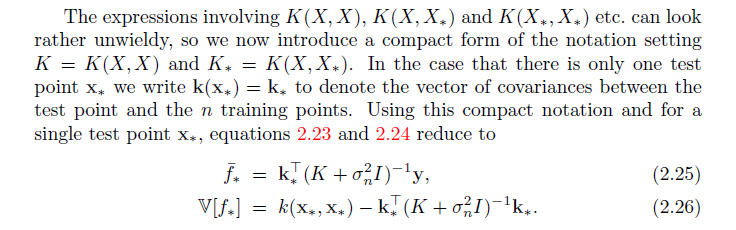

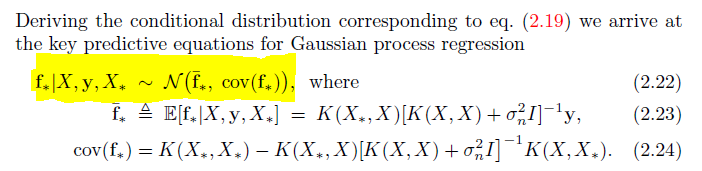

In [13]:
# By using the Cholesky decomposition we have:

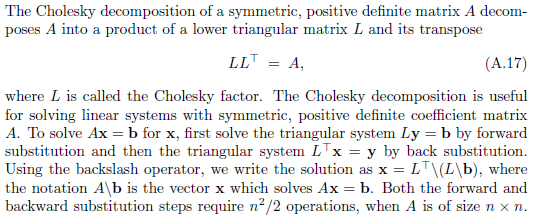

In [14]:
# The algorithm is:

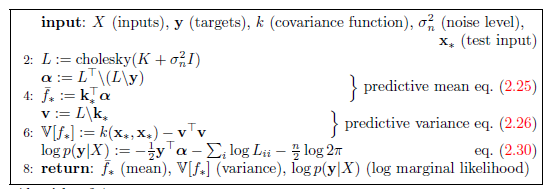

In [15]:
# Compute mean at our test points

K = rbf_kernel(Xtrain, Xtrain, gamma)
L = np.linalg.cholesky(K + sn*np.eye(len(Xtrain)))

Ly = np.linalg.solve(L, Ytrain)
alpha = np.linalg.solve(L.T, Ly)

Ks = rbf_kernel(Xtrain, Xtest, gamma)

meanFs = np.dot(Ks.T, alpha)

print('Predictive mean eq.2.25')
print(meanFs.shape)
print(meanFs)




## !!! To be removed 
Lk = np.linalg.solve(L, Ks)



# Compute the variance and standard deviation at our test points

#varFs = np.diag(Kss) - np.sum(Lk**2, axis=0) 
v = np.linalg.solve(L, Ks)
covFs = Kss - np.dot(v.T, v)   # Covariance matrix
varFs = np.diag(covFs)         # np.diag gets the diagonal elements (variance) from argument matrix
stdFs = np.sqrt(varFs)
print('\nPredictive variance, diagonal of eq.2.26')
print(meanFs.shape)
print(varFs)

Predictive mean eq.2.25
(50,)
[-3.98616962e-14 -4.79406036e-12 -3.80186436e-10 -1.98824093e-08
 -6.85801652e-07 -1.56085981e-05 -2.34625085e-04 -2.33432994e-03
 -1.54462284e-02 -6.86955345e-02 -2.09813618e-01 -4.57266216e-01
 -7.48347015e-01 -9.53602745e-01 -9.36610926e-01 -6.76905527e-01
 -3.45987102e-01 -1.39408529e-01 -1.19217398e-01 -2.64922141e-01
 -4.87445473e-01 -5.99414582e-01 -4.83846552e-01 -2.44770592e-01
 -3.62987355e-02  1.19724947e-01  2.72132100e-01  4.43215502e-01
  6.11437727e-01  7.35635954e-01  8.37681943e-01  9.60019330e-01
  9.81337512e-01  7.73390123e-01  5.06891243e-01  4.61298276e-01
  6.36002594e-01  7.48319955e-01  6.01749139e-01  3.11649655e-01
  8.08478993e-02 -3.56458983e-02 -7.25442805e-02 -6.18052339e-02
 -3.32839860e-02 -1.17583954e-02 -2.73718966e-03 -4.20094281e-04
 -4.25112337e-05 -2.83647818e-06]

Predictive variance, diagonal of eq.2.26
(50,)
[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 9.99999998e-01 9.99999621e-01 9

(-5.0, 5.0, -4.0, 4.0)

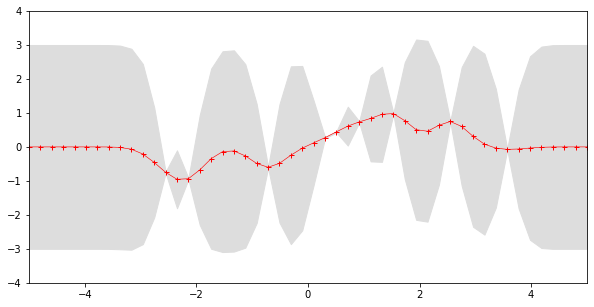

In [16]:
# Let's plot the mean and the standard deviation
plt.figure(1, figsize=(10, 5))
plt.clf()

plt.plot(Xtest, meanFs, 'r', marker='+', color = 'r', linewidth=0.6, markersize=5)
plt.gca().fill_between(Xtest.flat, meanFs-3*stdFs, meanFs+3*stdFs, color="#dddddd")
plt.axis([-5, 5, -4, 4])

In [17]:
# We sample now 3 regression functions from the posterior distribution

f_post = np.random.multivariate_normal(meanFs, covFs, 3).T
f_post

array([[-5.94504622e-03, -1.43996389e+00, -7.88332879e-01],
       [ 7.50976391e-02, -4.95327958e-01, -5.21280037e-01],
       [-4.82482008e-01, -9.32248149e-02, -2.12156615e-01],
       [-8.86874427e-01, -7.49608897e-02,  1.01557673e-01],
       [-2.99661584e-01,  1.42116339e-01,  5.97497186e-01],
       [ 4.66095740e-01,  1.24966913e-01,  6.70968756e-01],
       [ 3.19077049e-01, -2.71018077e-01, -2.43975464e-01],
       [-2.72533563e-01, -5.44213891e-01, -4.71957455e-01],
       [-5.31837855e-01, -4.96093196e-01, -8.95523773e-02],
       [-6.43788996e-01, -2.04626725e-01, -6.03359270e-01],
       [-8.65649916e-01, -1.88471910e-01, -1.36604525e+00],
       [-9.85339609e-01, -5.52384303e-01, -1.24886734e+00],
       [-7.53805347e-01, -7.68769630e-01, -7.35214142e-01],
       [-5.51500887e-01, -9.21906295e-01, -5.21009308e-01],
       [-9.35273781e-01, -9.34729761e-01, -9.45025235e-01],
       [-1.57597625e+00, -6.18465030e-01, -1.44045129e+00],
       [-1.32935587e+00, -8.21987930e-01

(-5.0, 5.0, -4.0, 4.0)

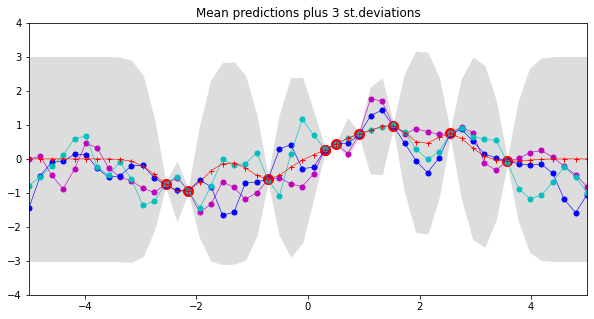

In [18]:
# Plot the functions sampled from the posterior distribution

plt.figure(1, figsize=(10, 5))
plt.clf()

plt.plot(Xtrain, Ytrain, 'ro', ms=10)

plt.plot(Xtest, f_post[:,0], marker='o', color = 'm', markersize=5, linewidth=0.6)
plt.plot(Xtest, f_post[:,1], marker='o', color = 'b', markersize=5, linewidth=0.6)
plt.plot(Xtest, f_post[:,2], marker='o', color = 'c', markersize=5, linewidth=0.6)

plt.gca().fill_between(Xtest.flat, meanFs-3*stdFs, meanFs+3*stdFs, color="#dddddd")

plt.plot(Xtest, meanFs, marker='+', color='r', markersize=5, linewidth=0.6)

plt.savefig('predictive.png', bbox_inches='tight')
plt.title('Mean predictions plus 3 st.deviations')
plt.axis([-5, 5, -4, 4])